In [1]:
"""
Import
"""
import numpy as np
import pandas as pd

import sys

import matplotlib.pyplot as plt
sys.path.insert(0, "/home/chalifour/code/master")

from datetime import timedelta,date

In [2]:
saving_fig_path = '/upslope/chalifour/projet_maitrise/fig/station_accumualtion_treatement_fig'

In [3]:
df_acc_1 = pd.read_csv('/upslope/chalifour/projet_maitrise/data_format-master/Data.nosync/df_accumulation.csv', parse_dates=['date'])
df_acc_1.set_index('date', inplace=True)
df_acc_1.sort_index(inplace=True)

df_acc_2 = pd.read_csv('/upslope/chalifour/projet_maitrise/data_format-master/Data.nosync/df_acc_undercatch.csv', parse_dates=['date'])
df_acc_2.set_index('date', inplace=True)
df_acc_2.sort_index(inplace=True)

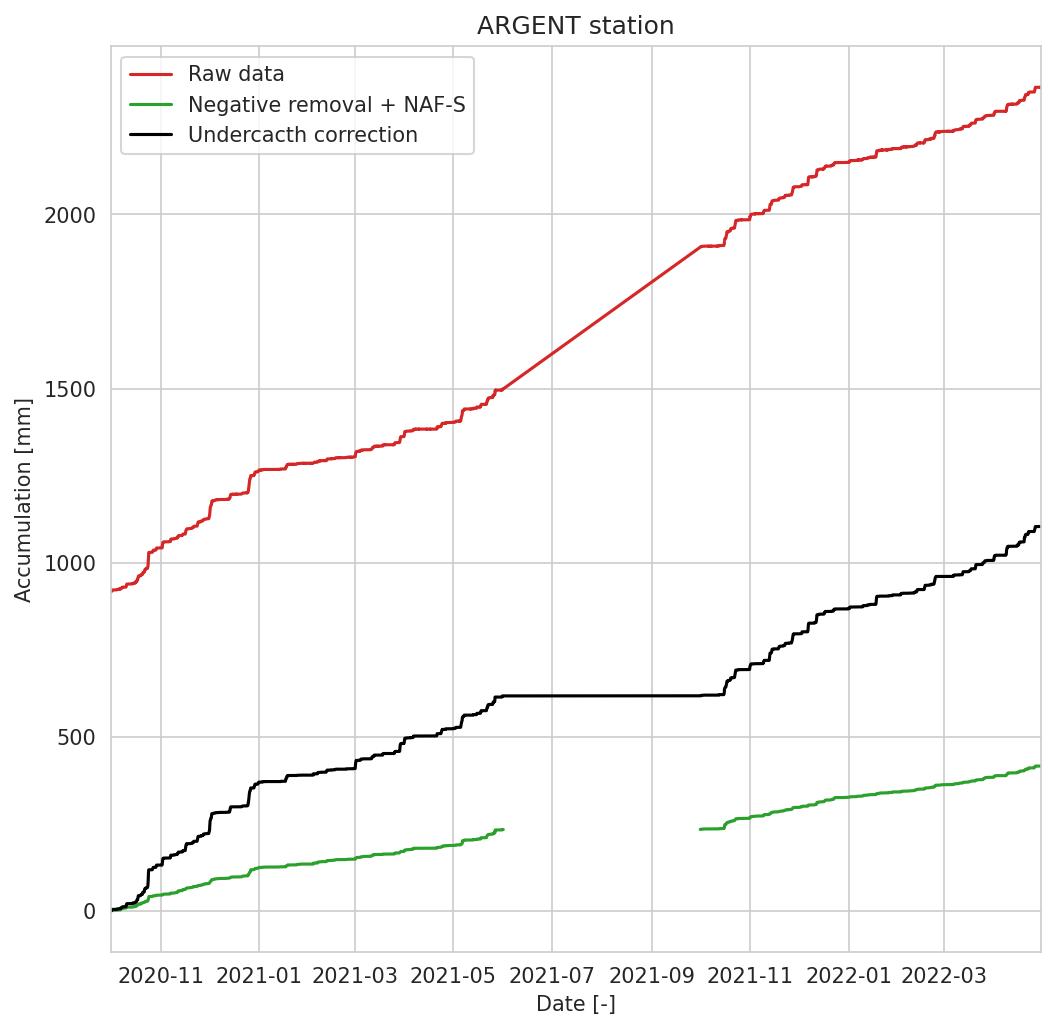

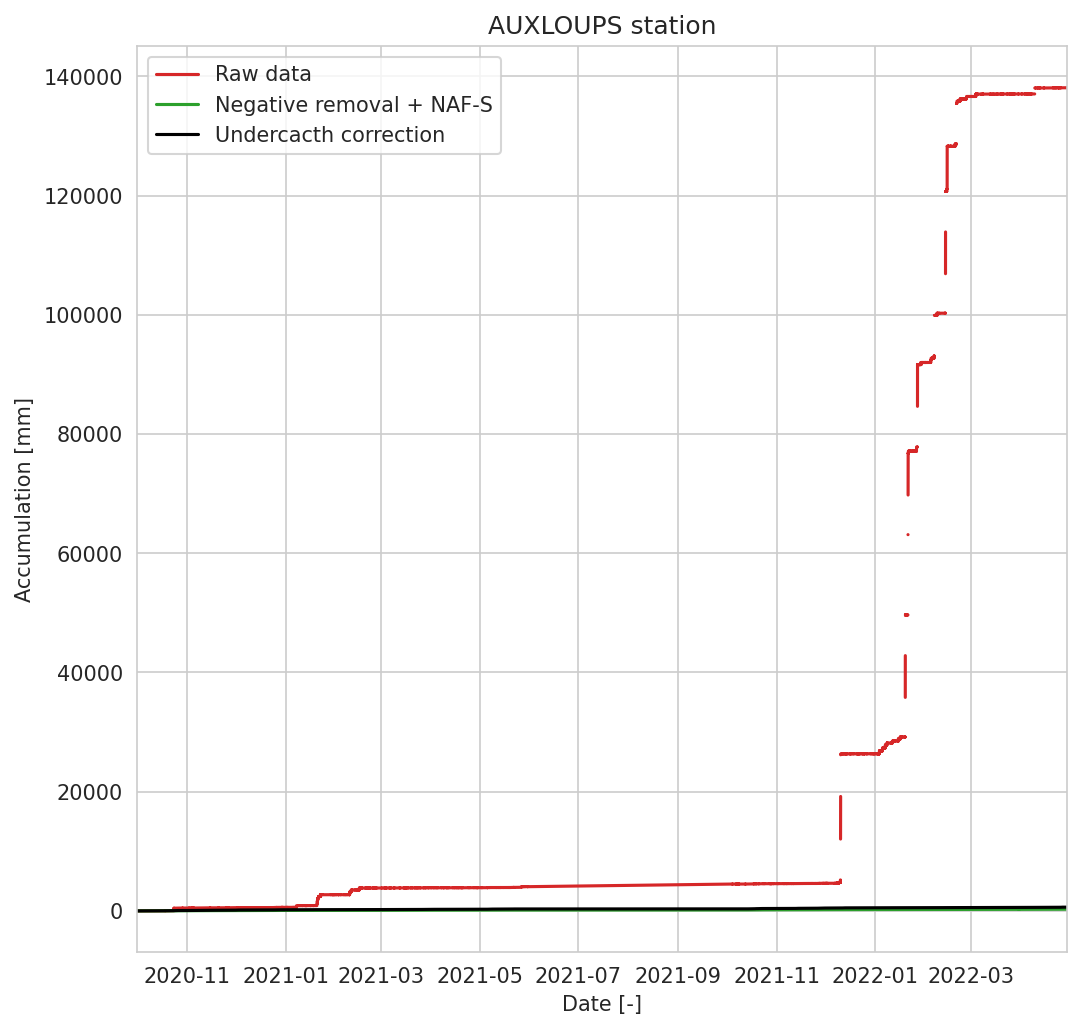

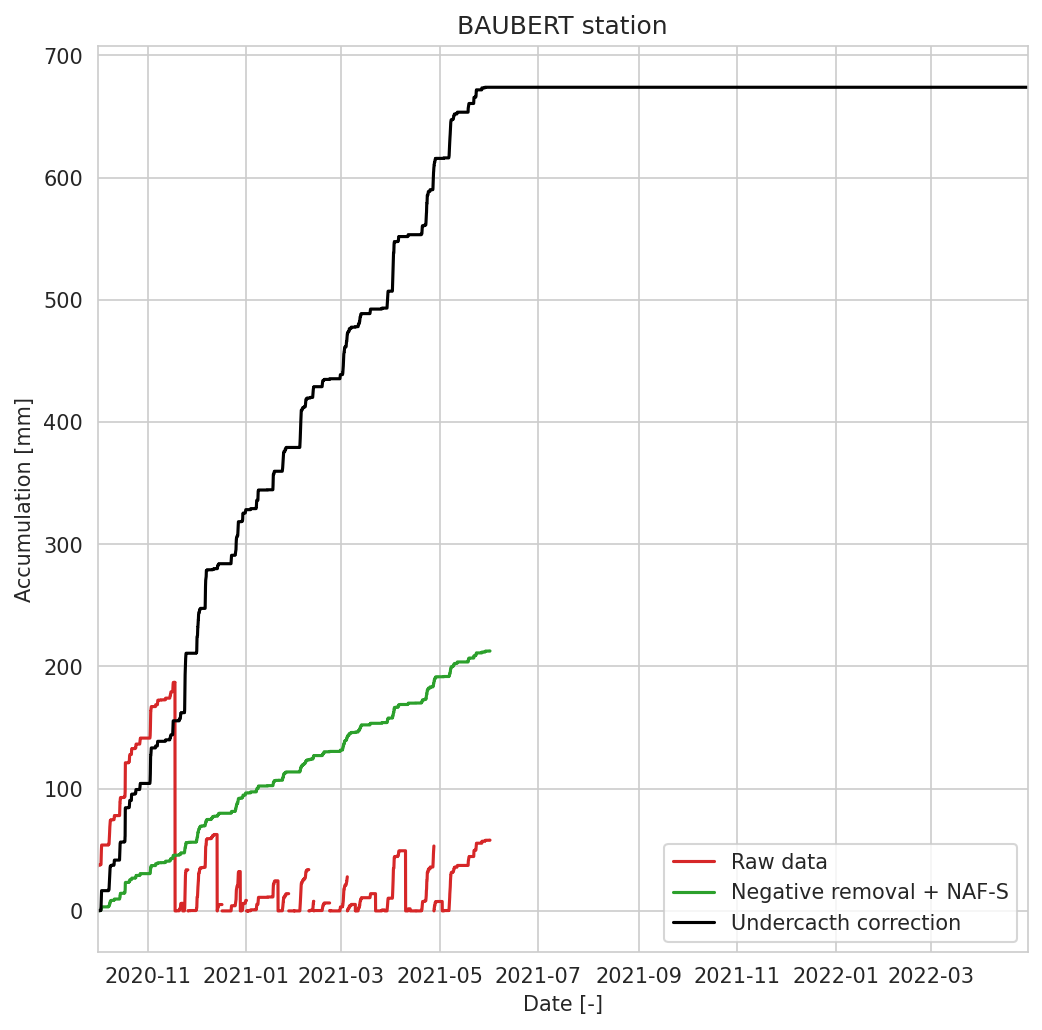

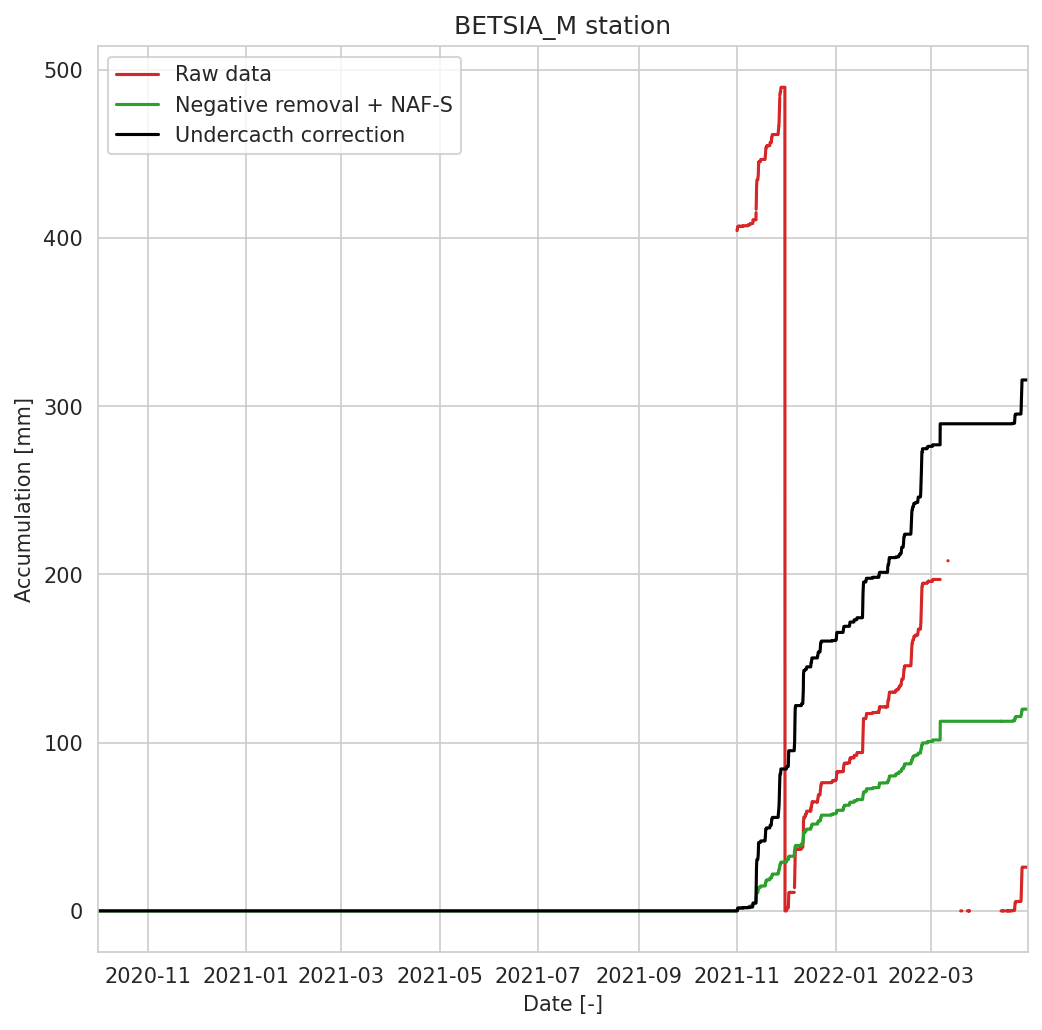

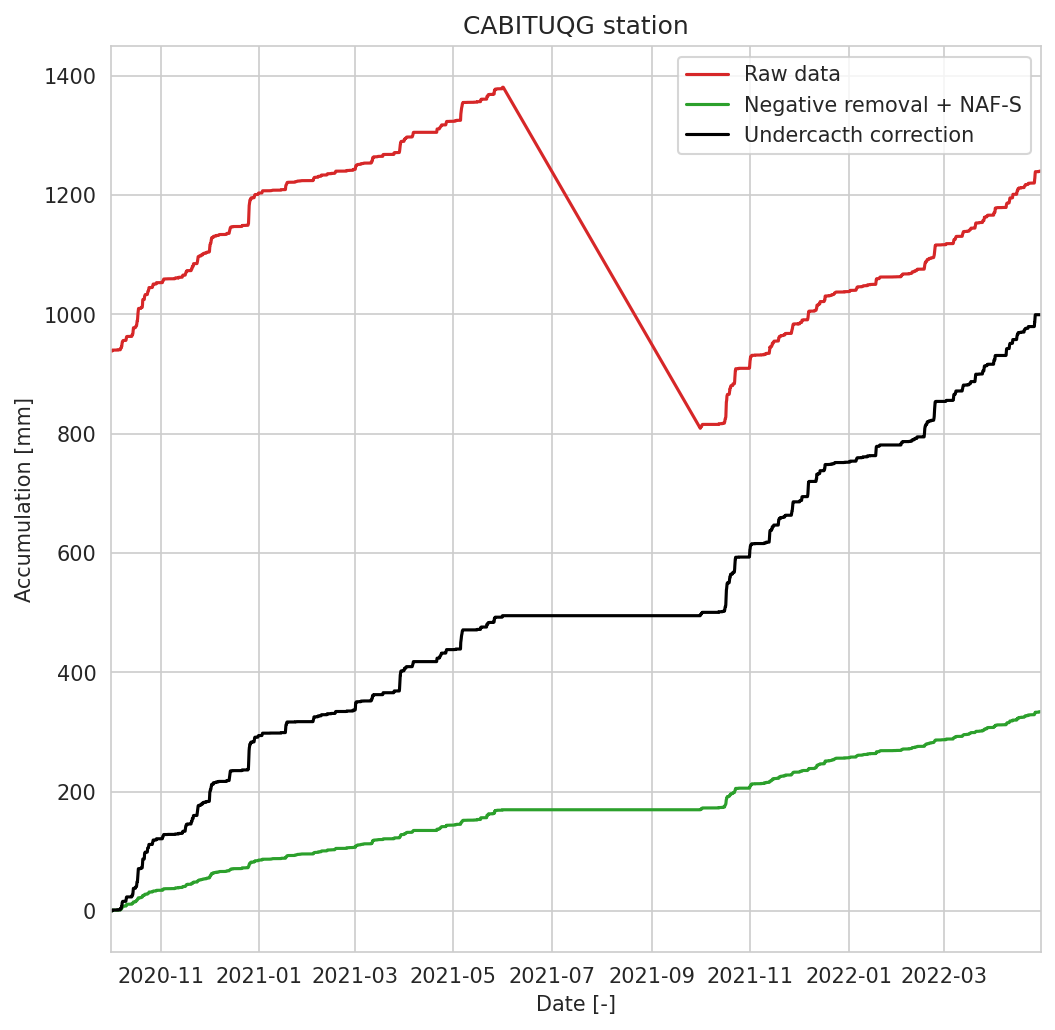

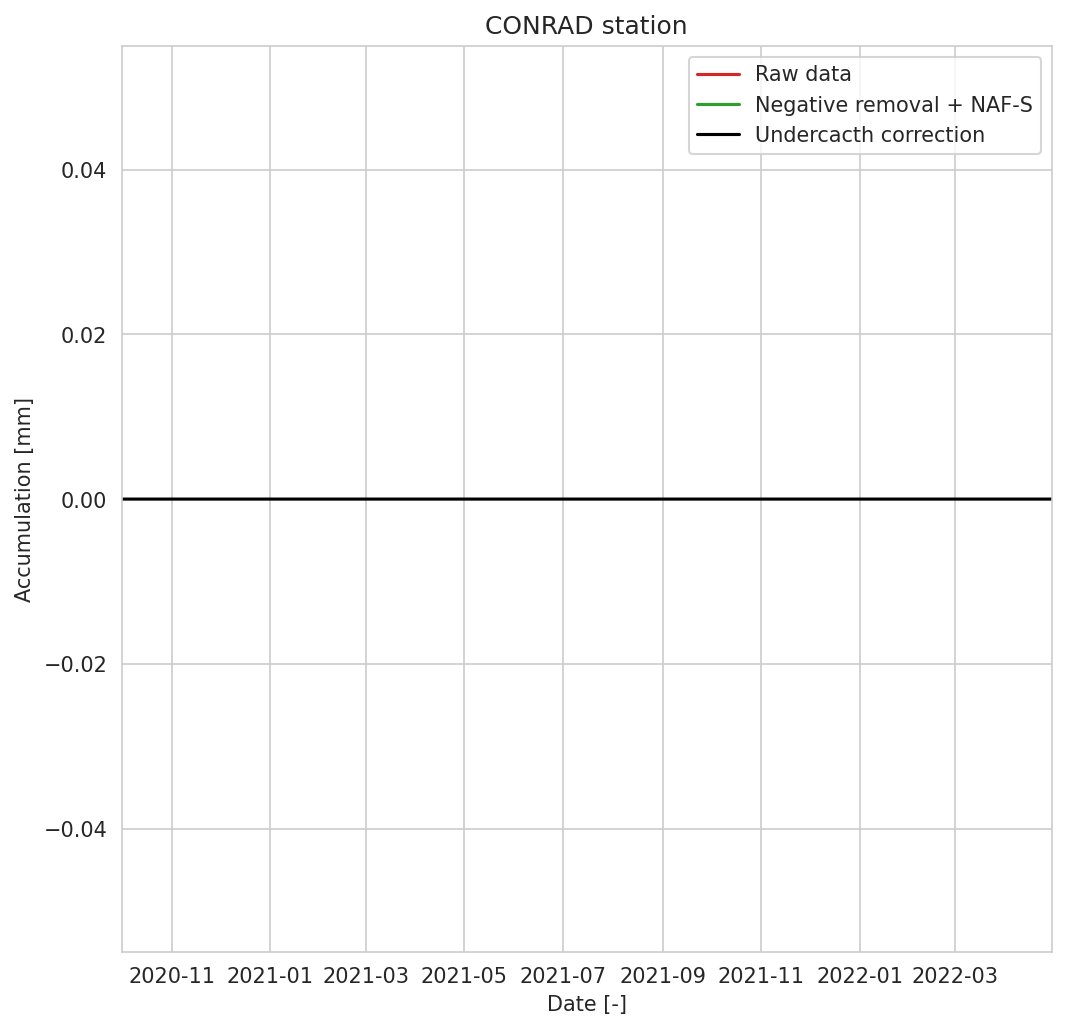

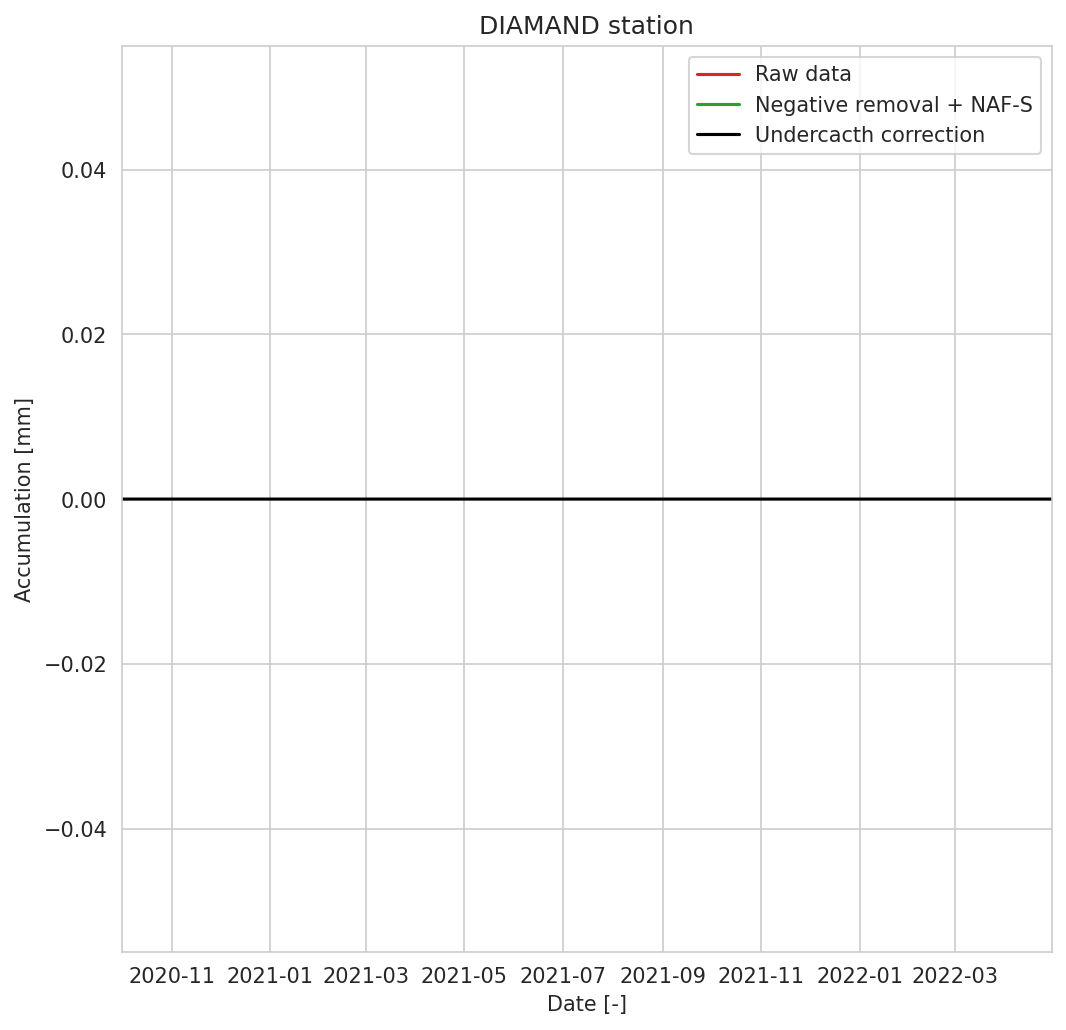

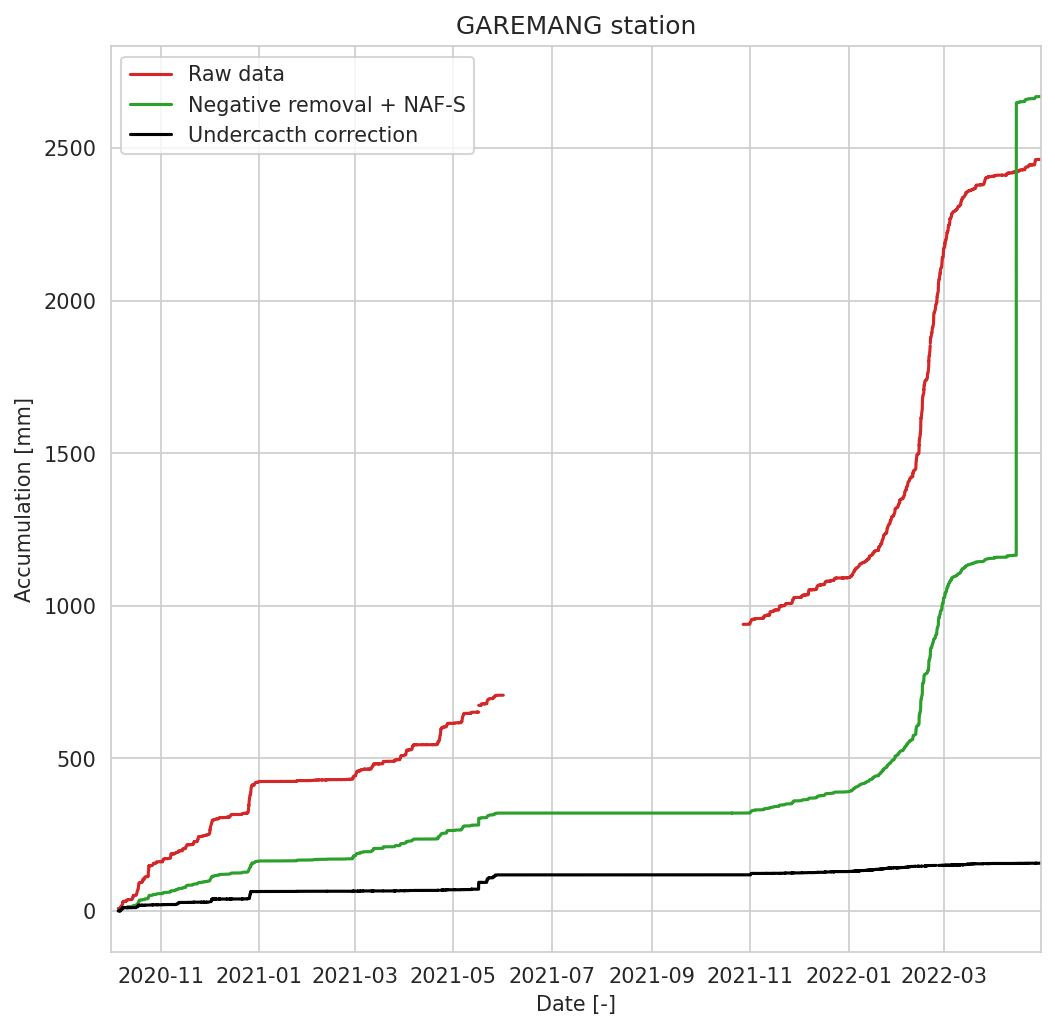

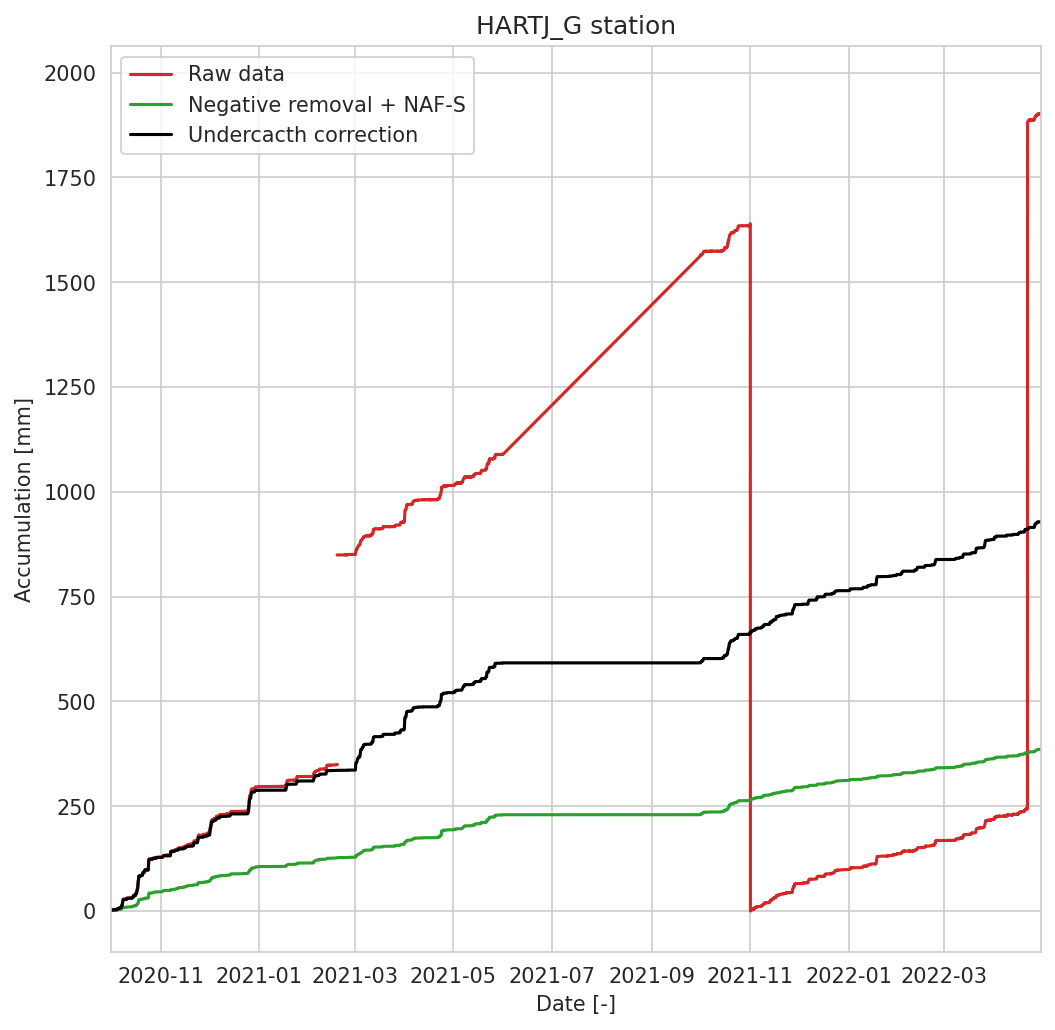

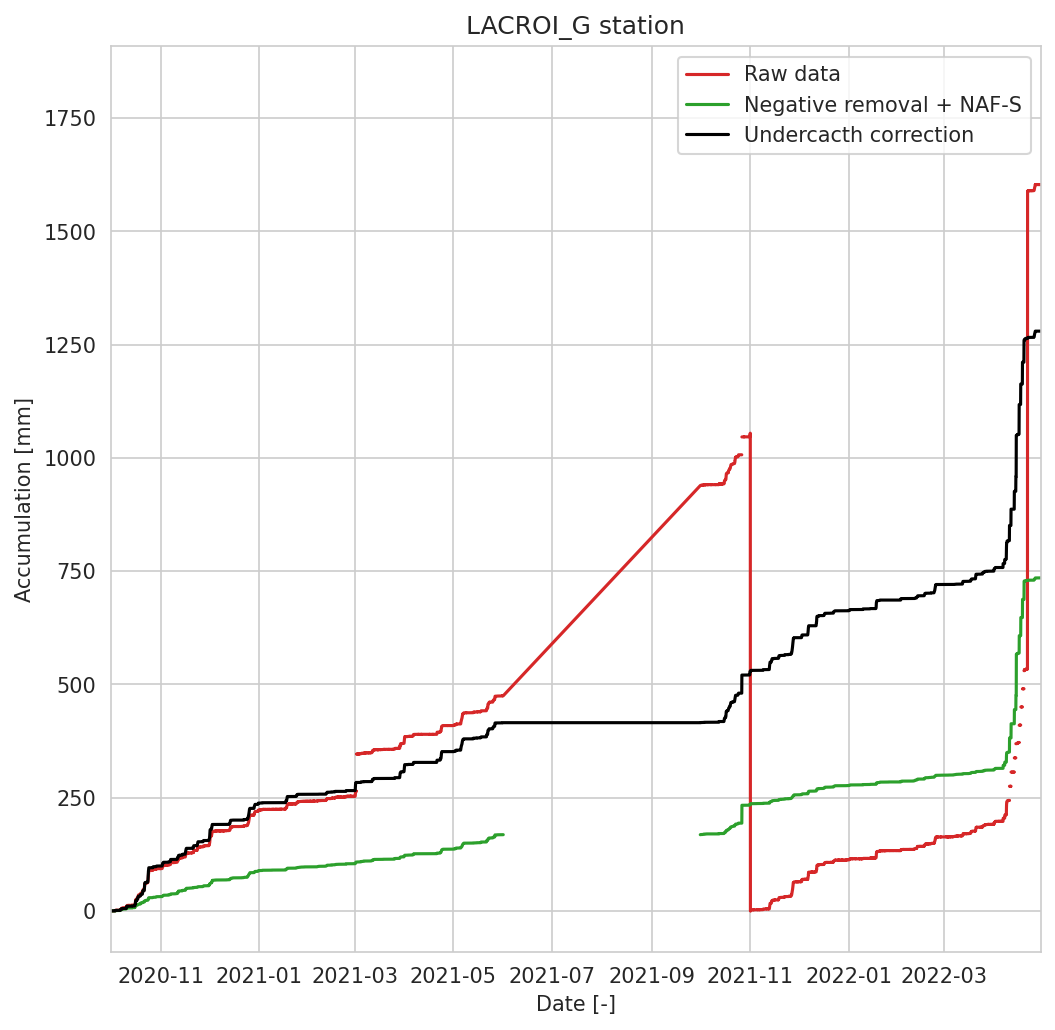

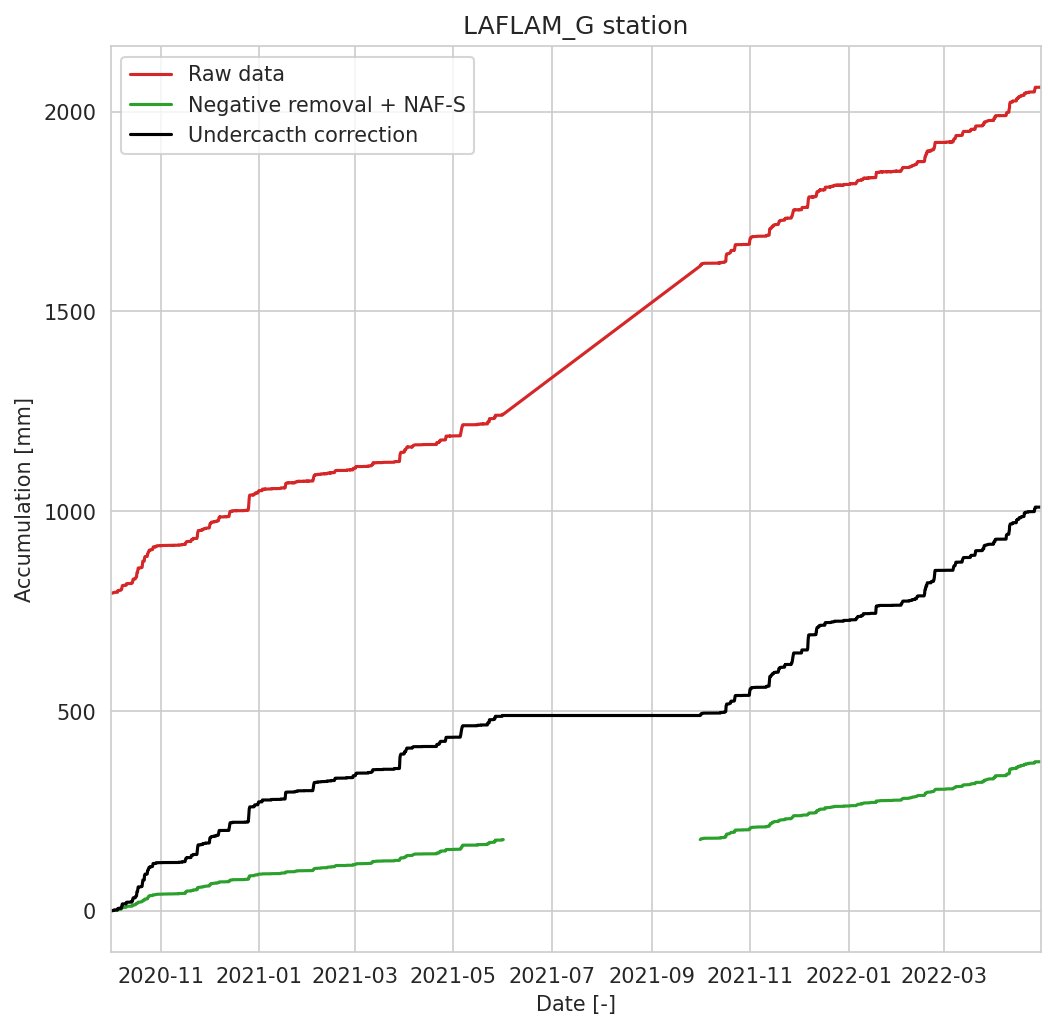

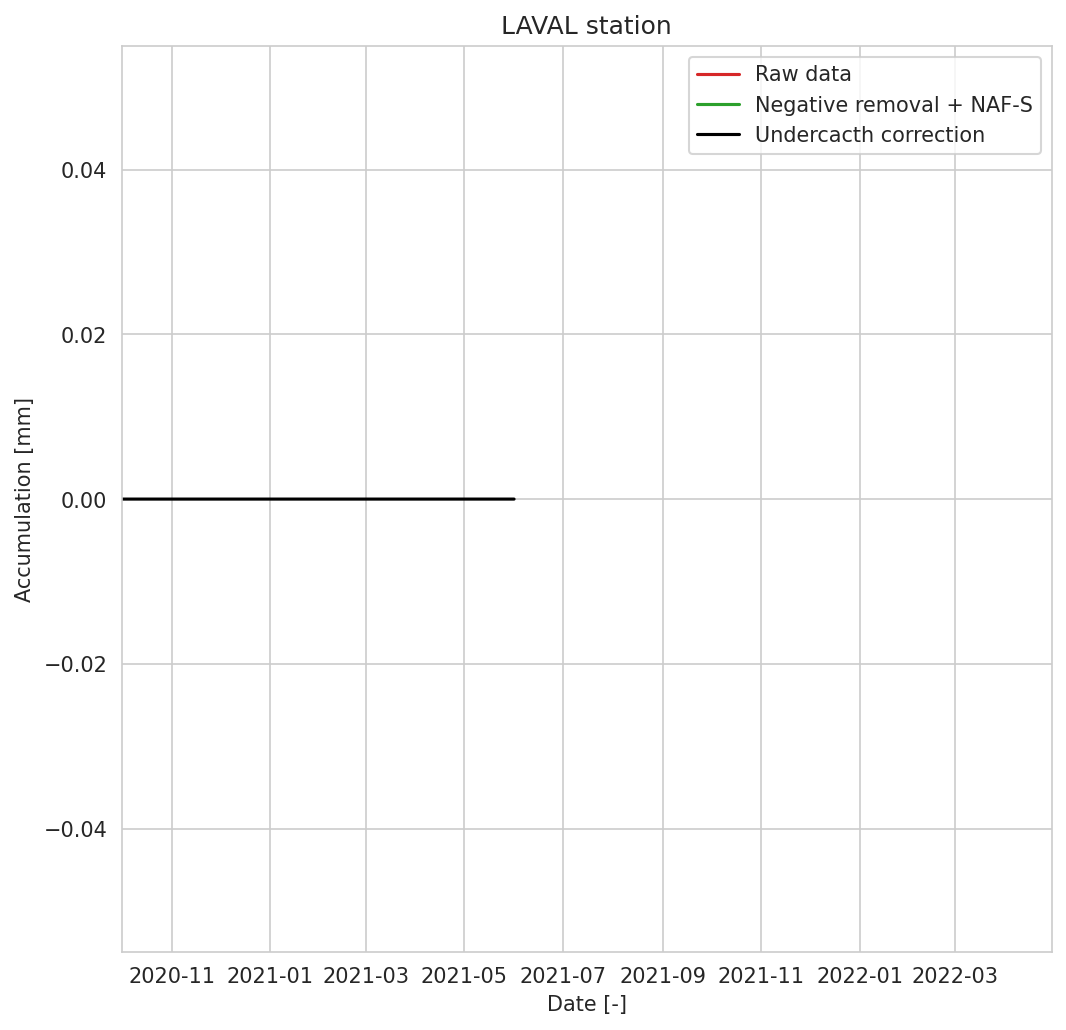

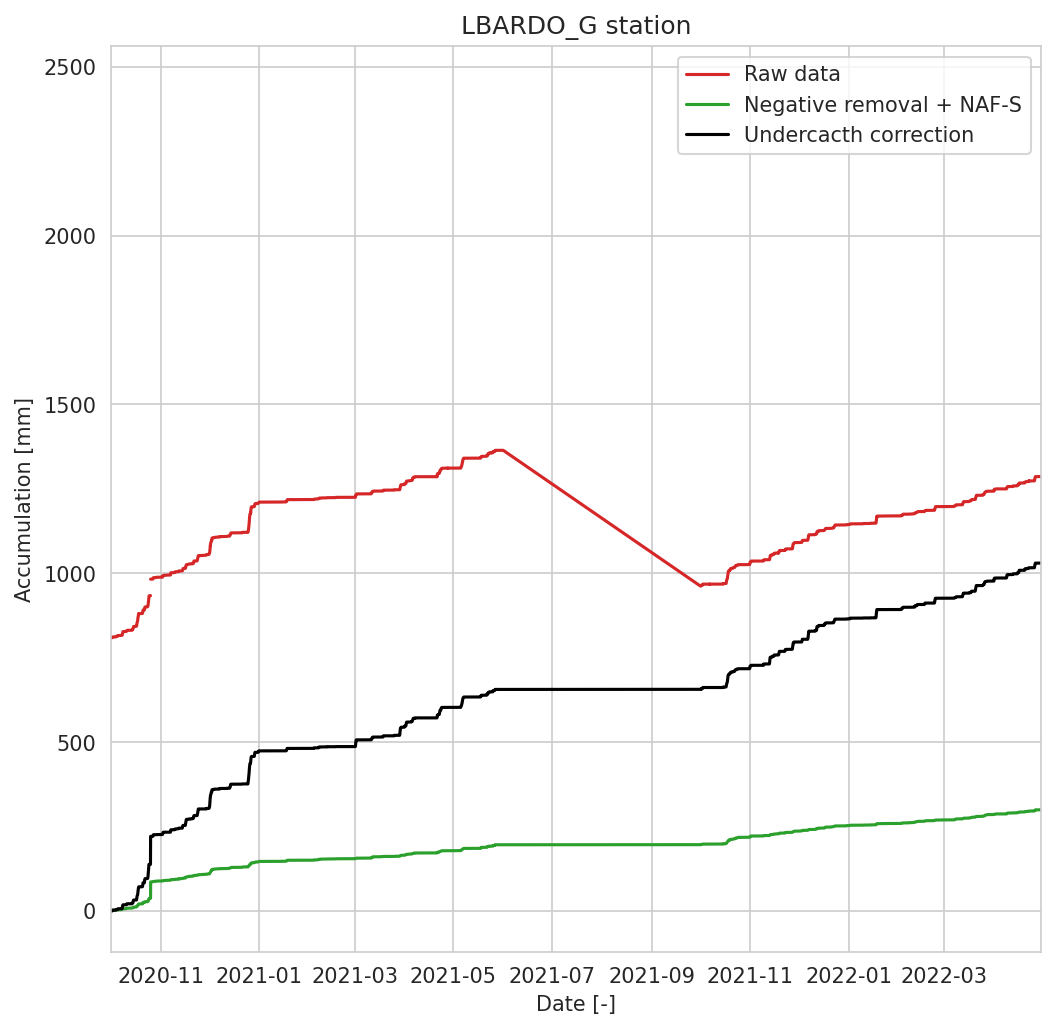

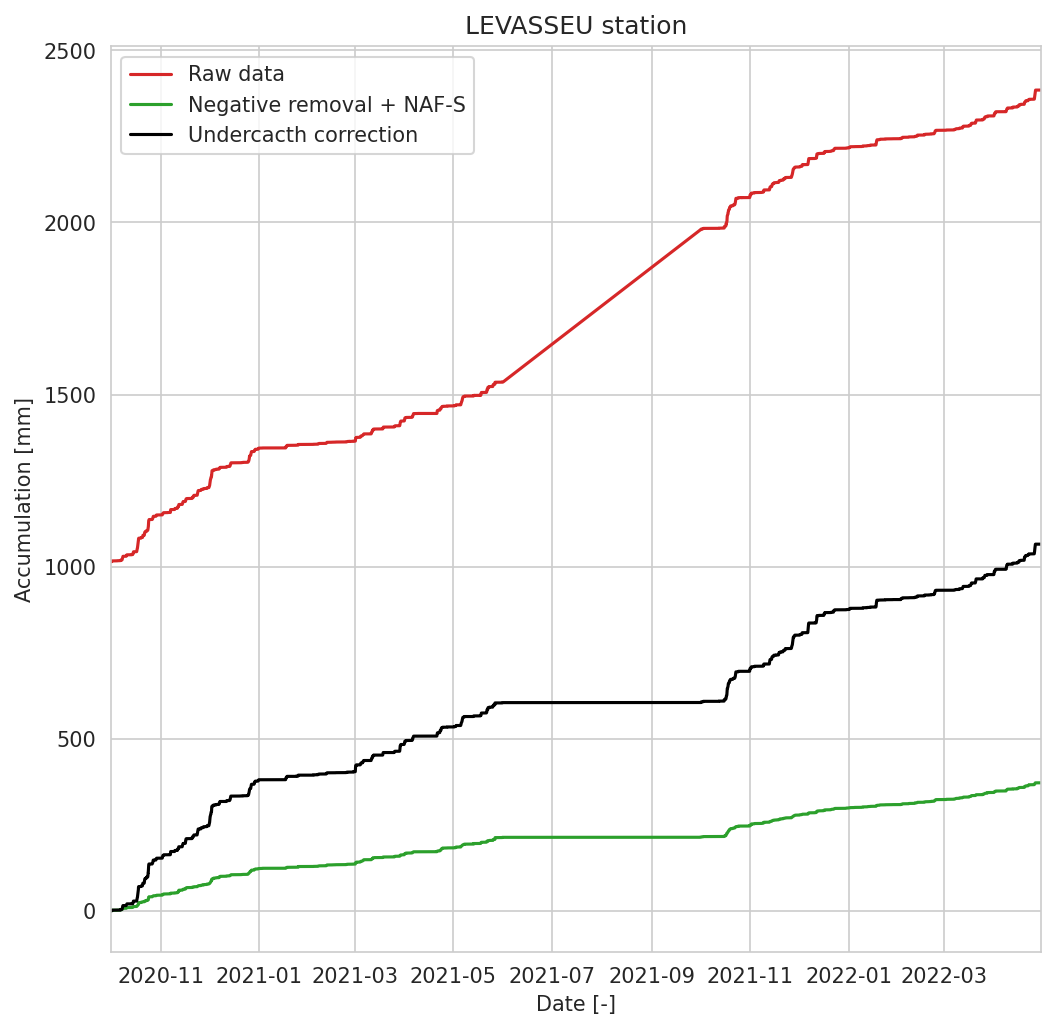

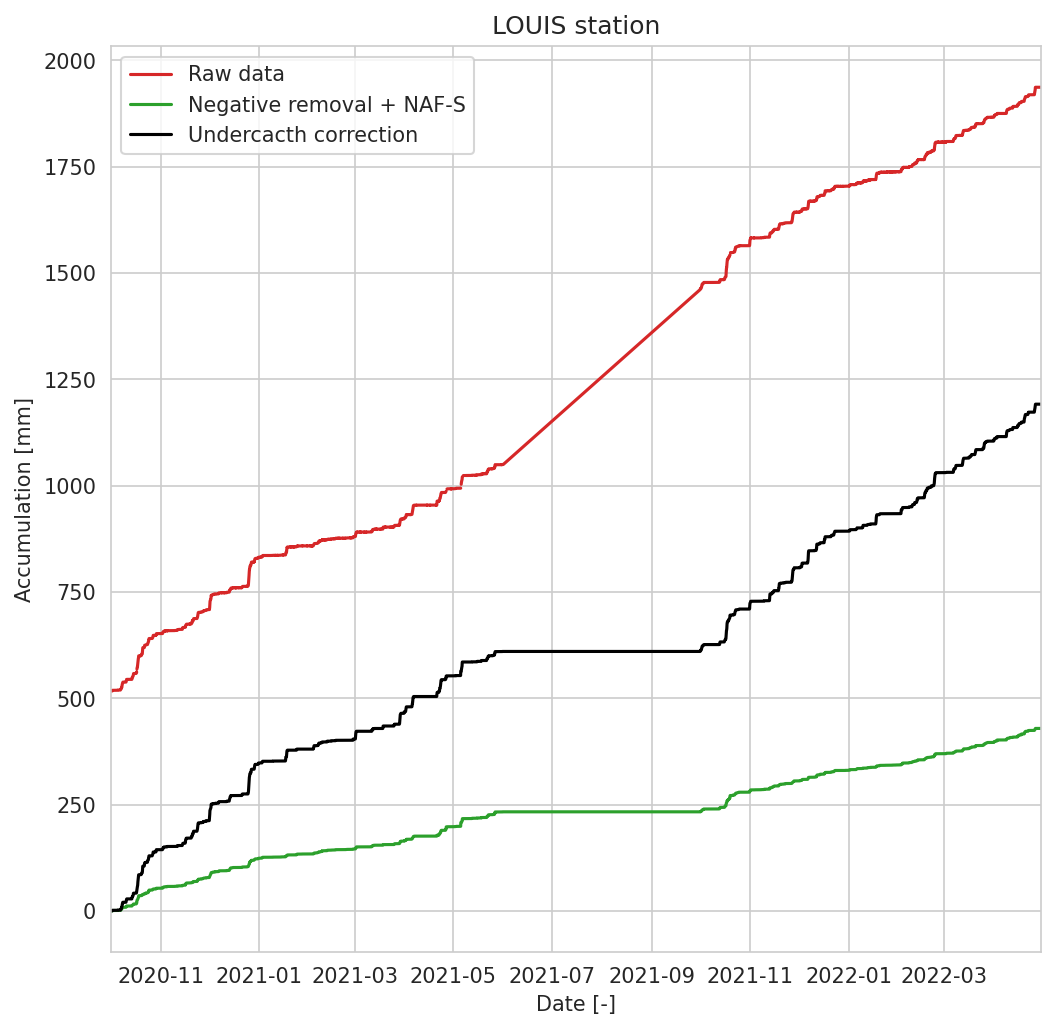

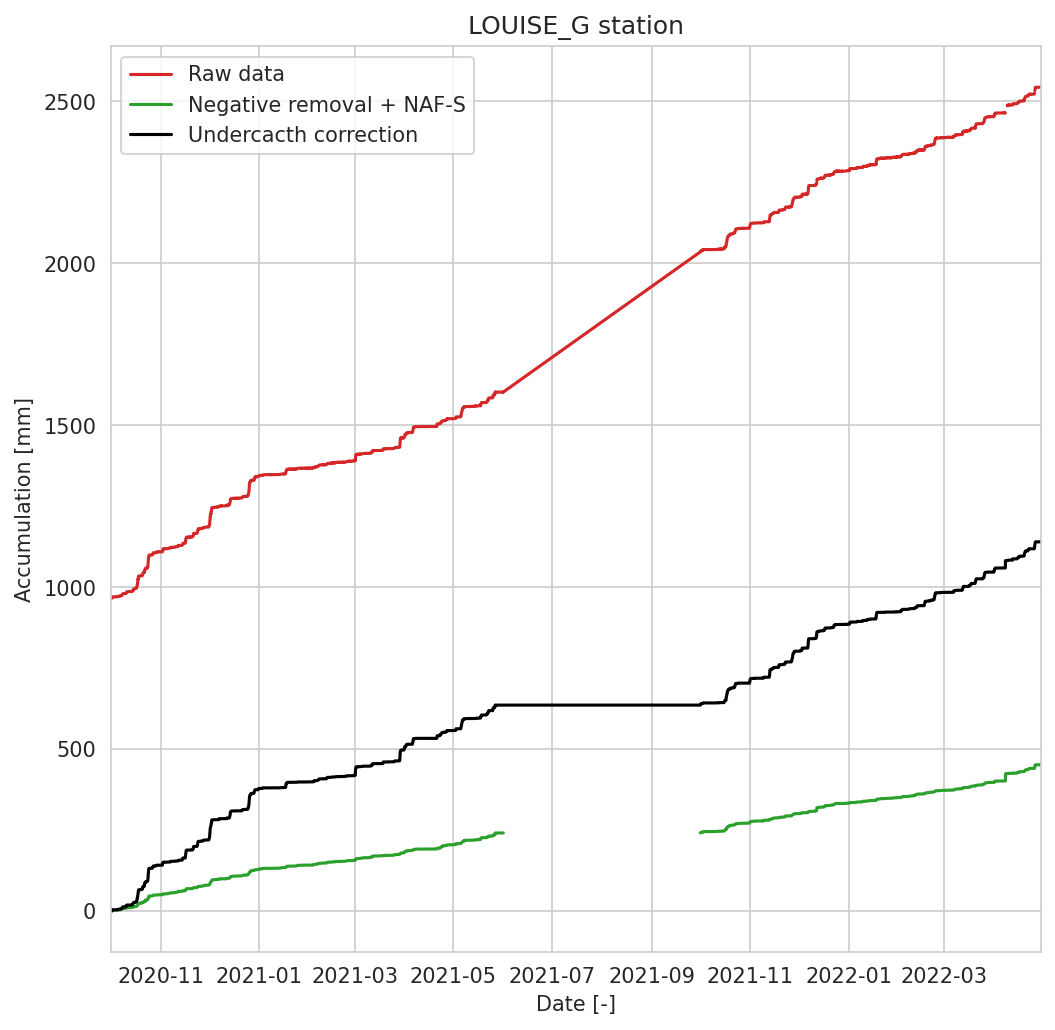

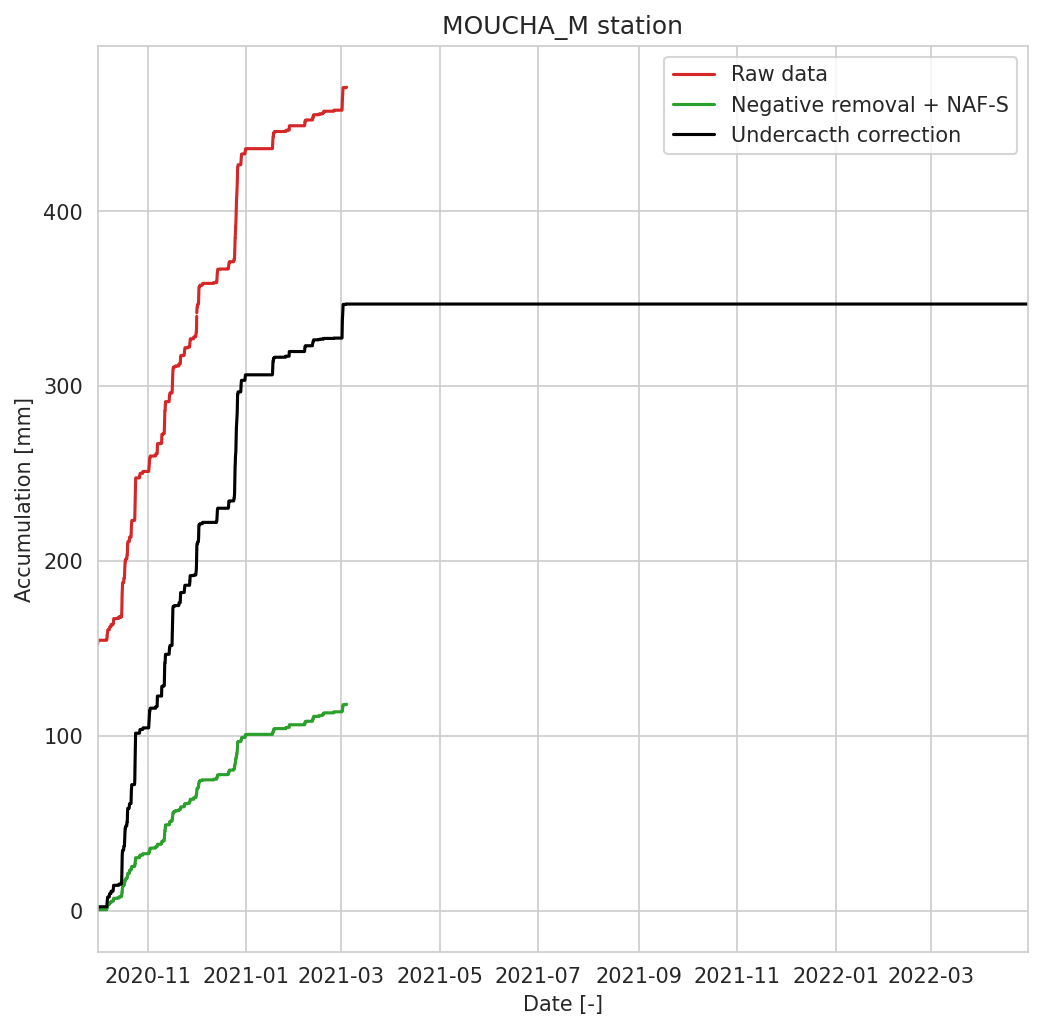

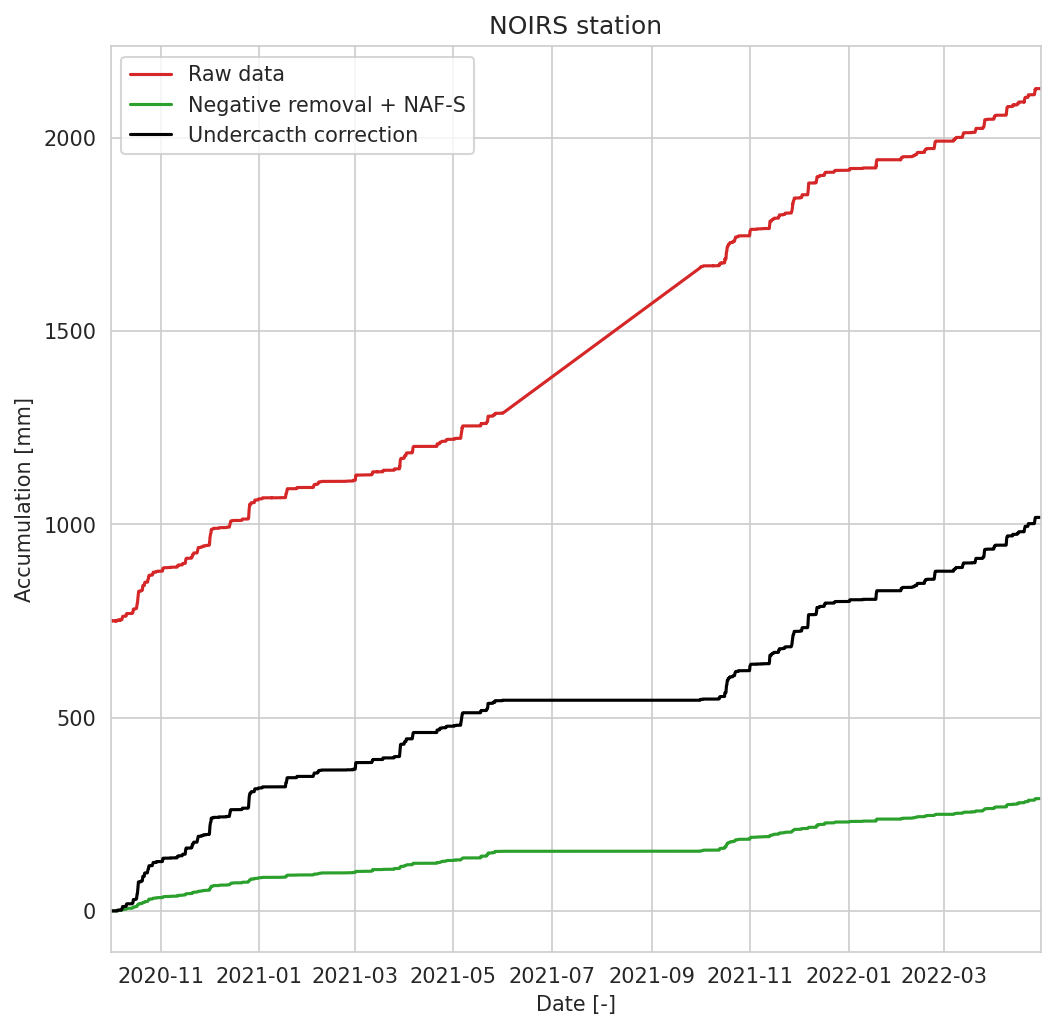

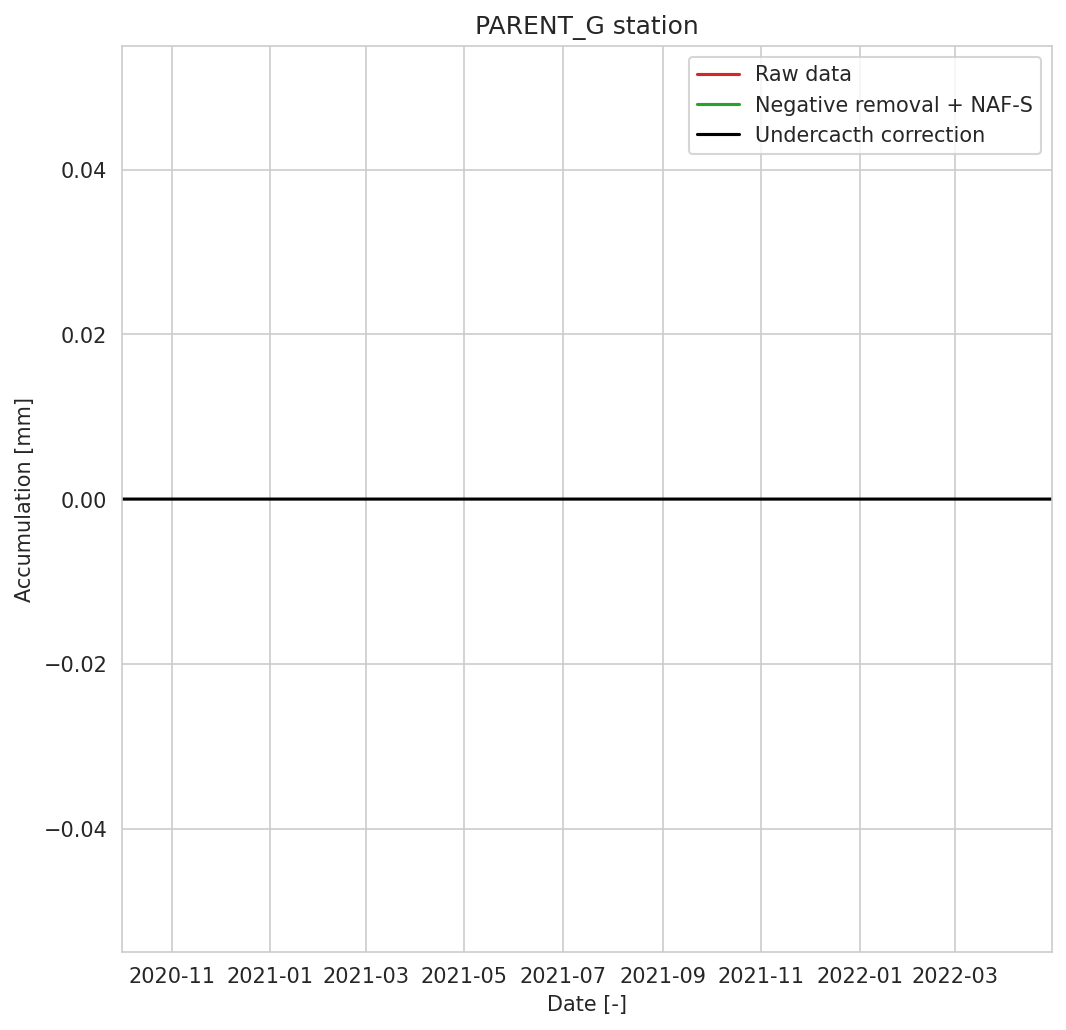

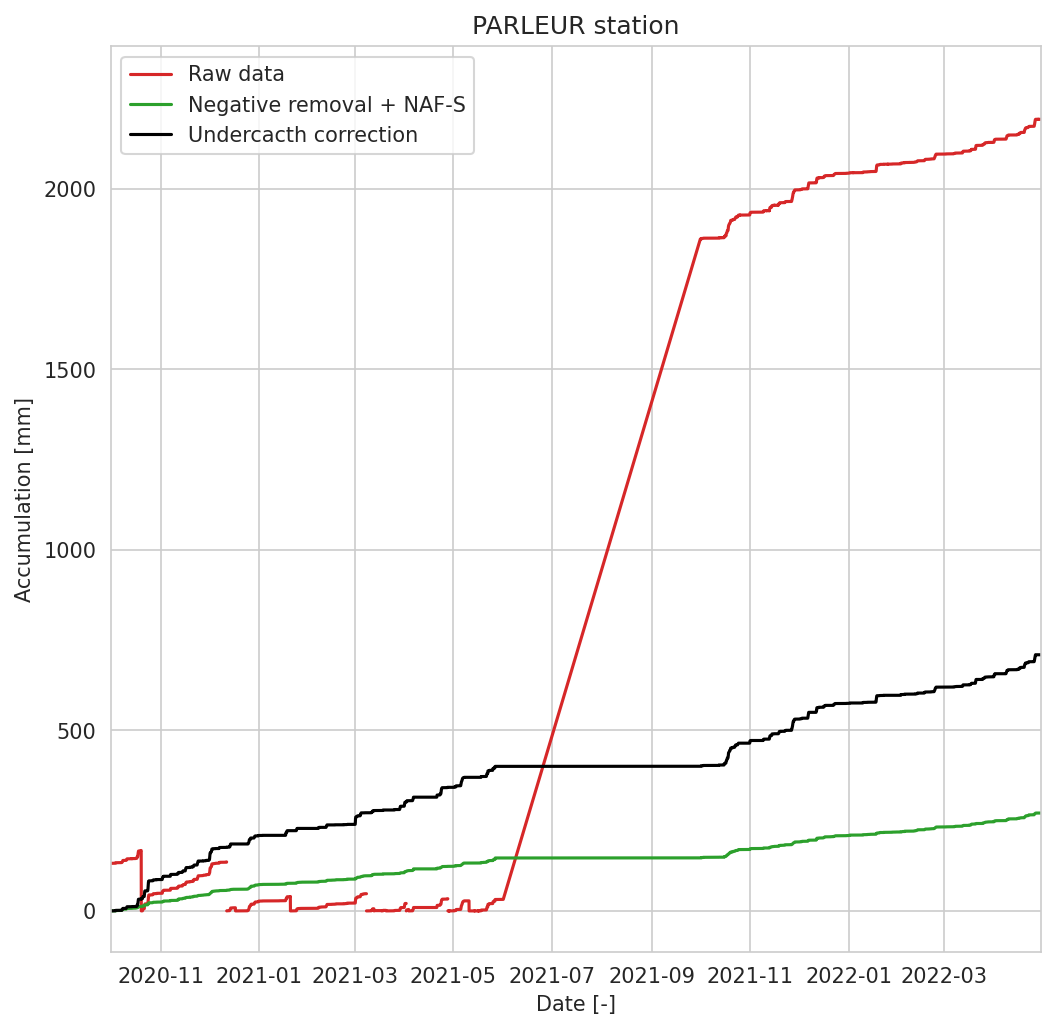

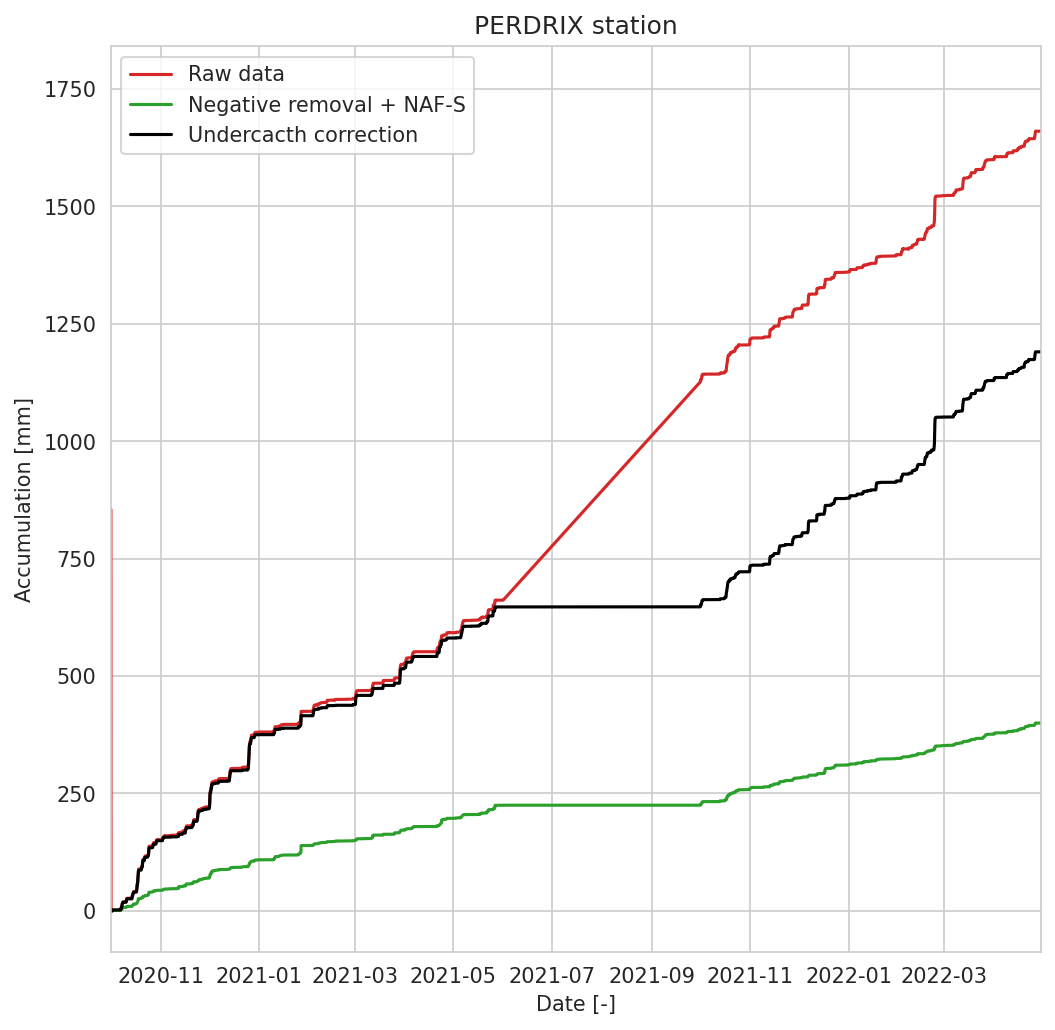

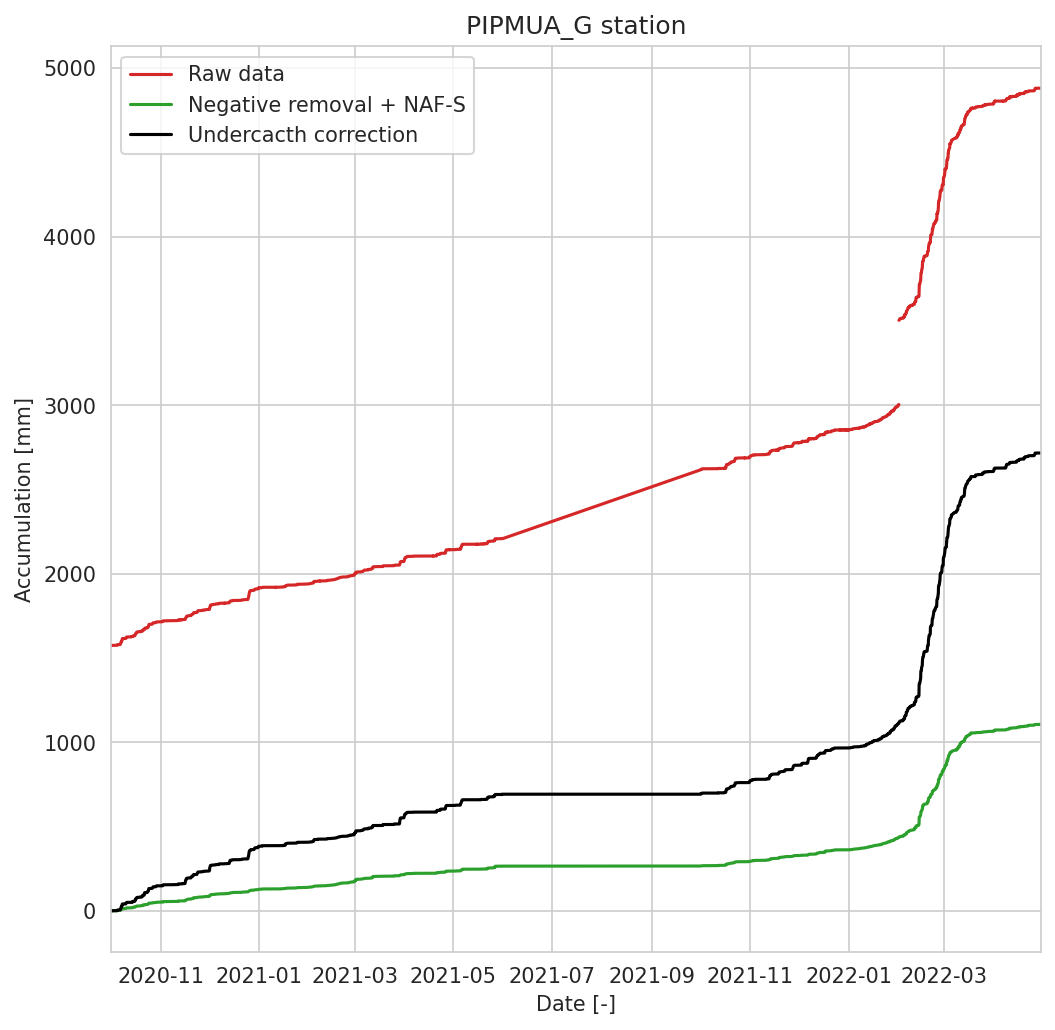

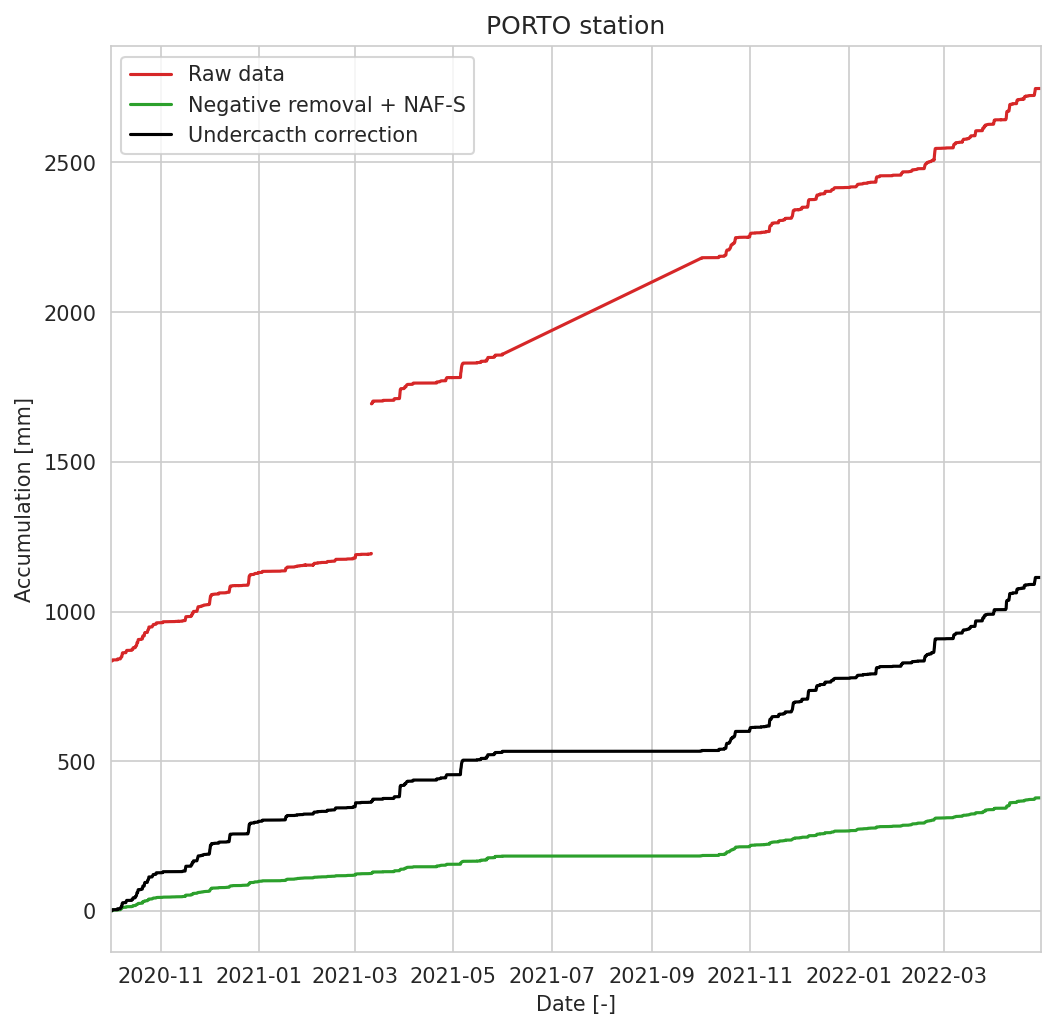

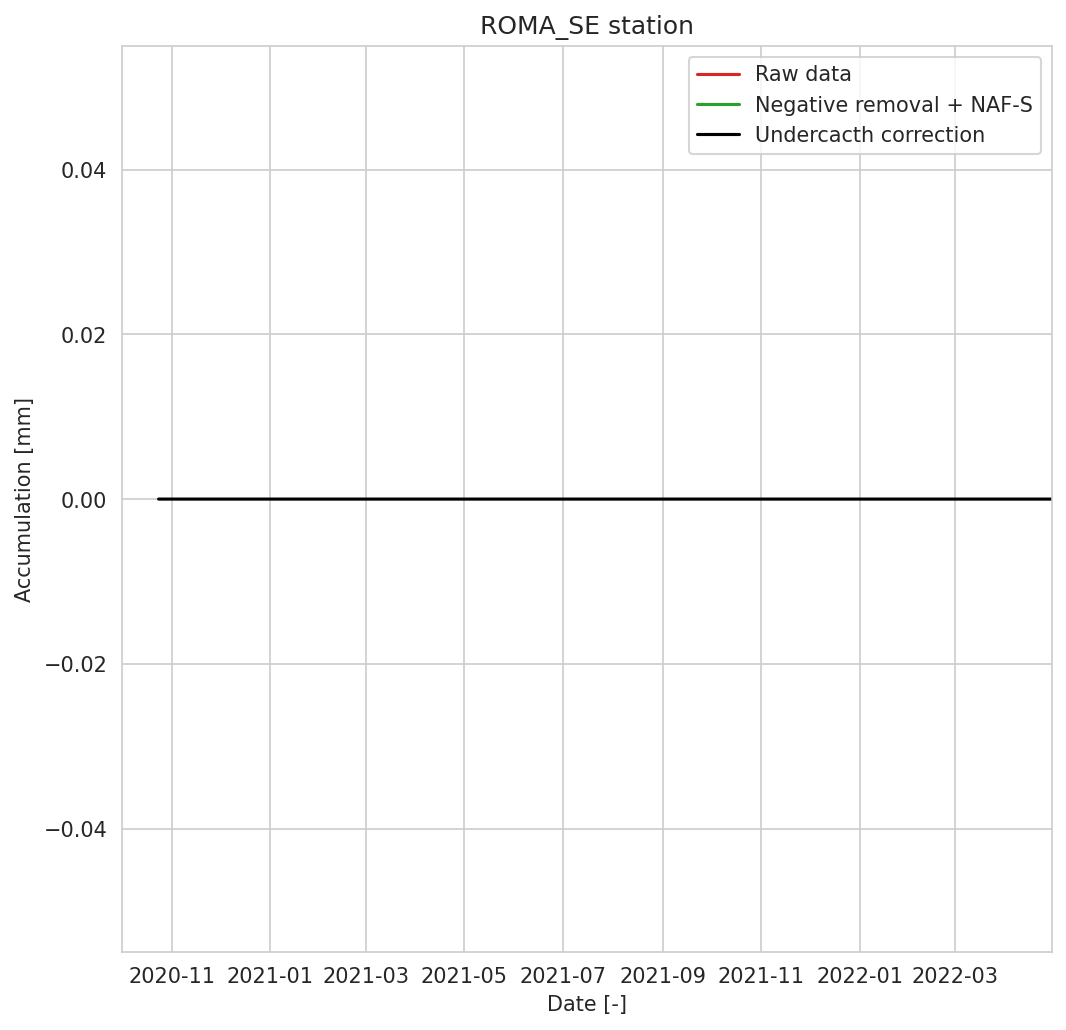

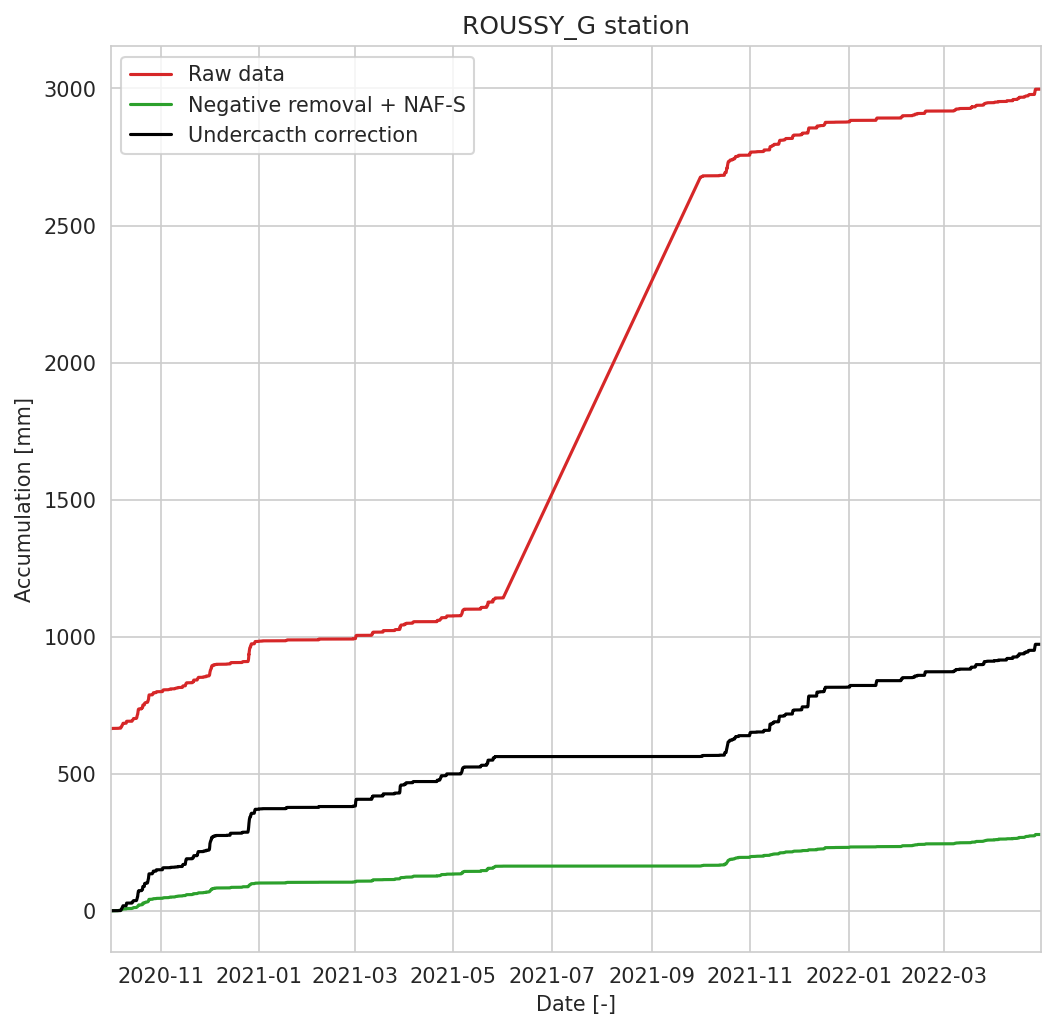

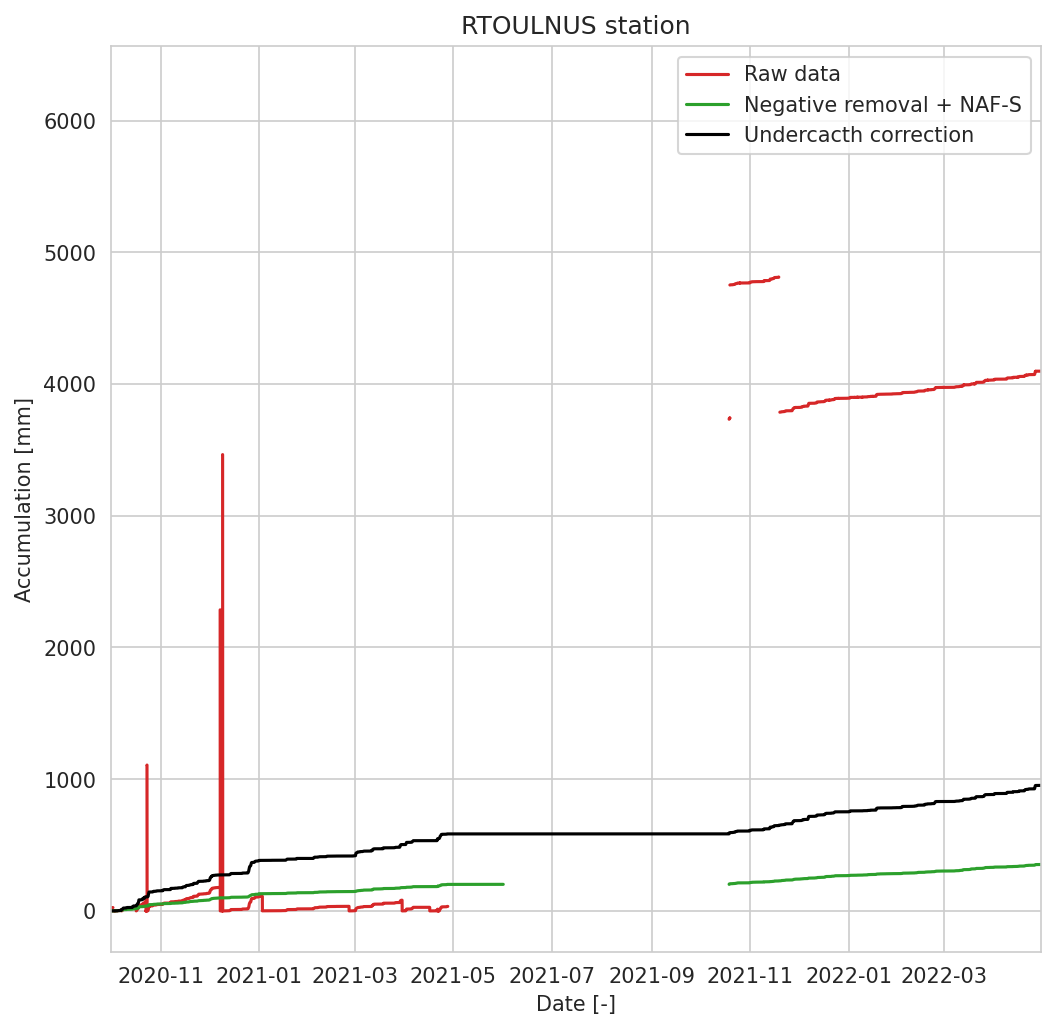

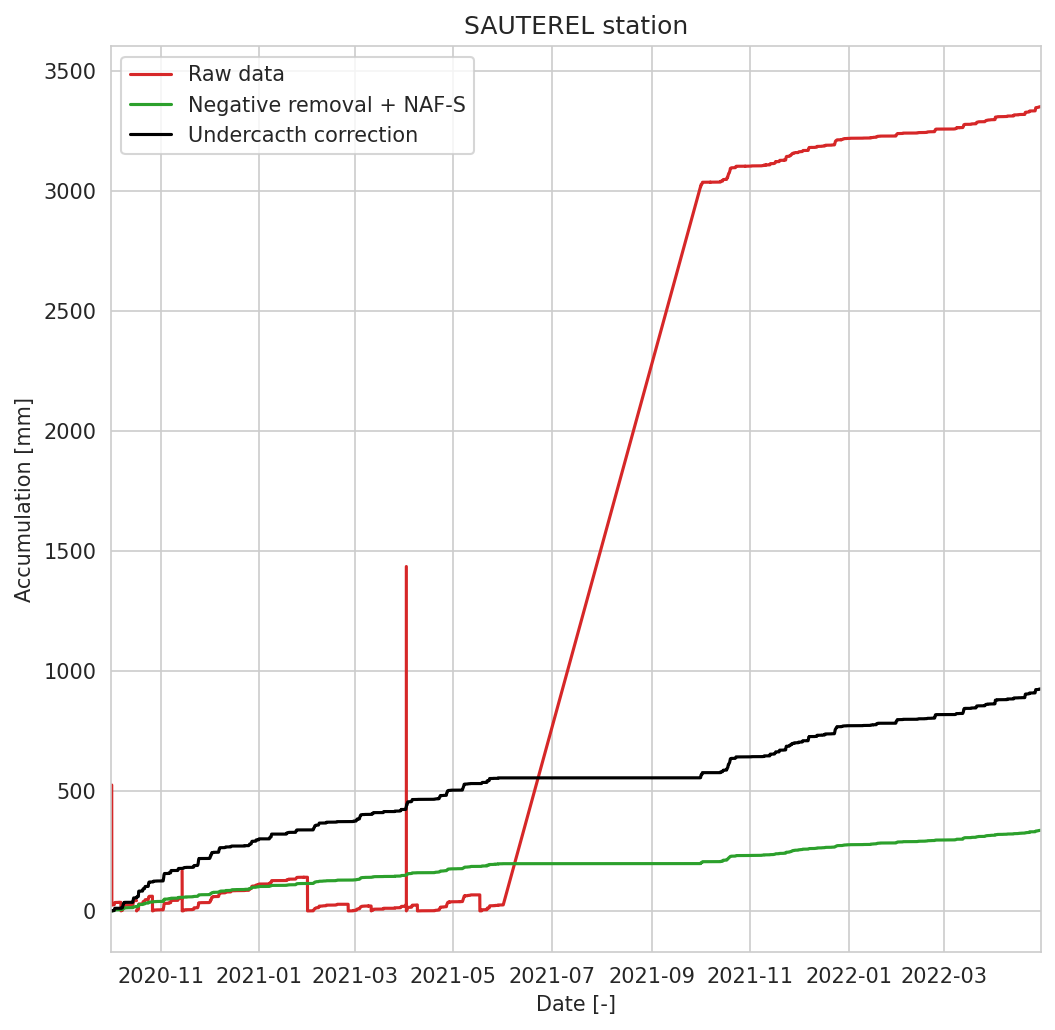

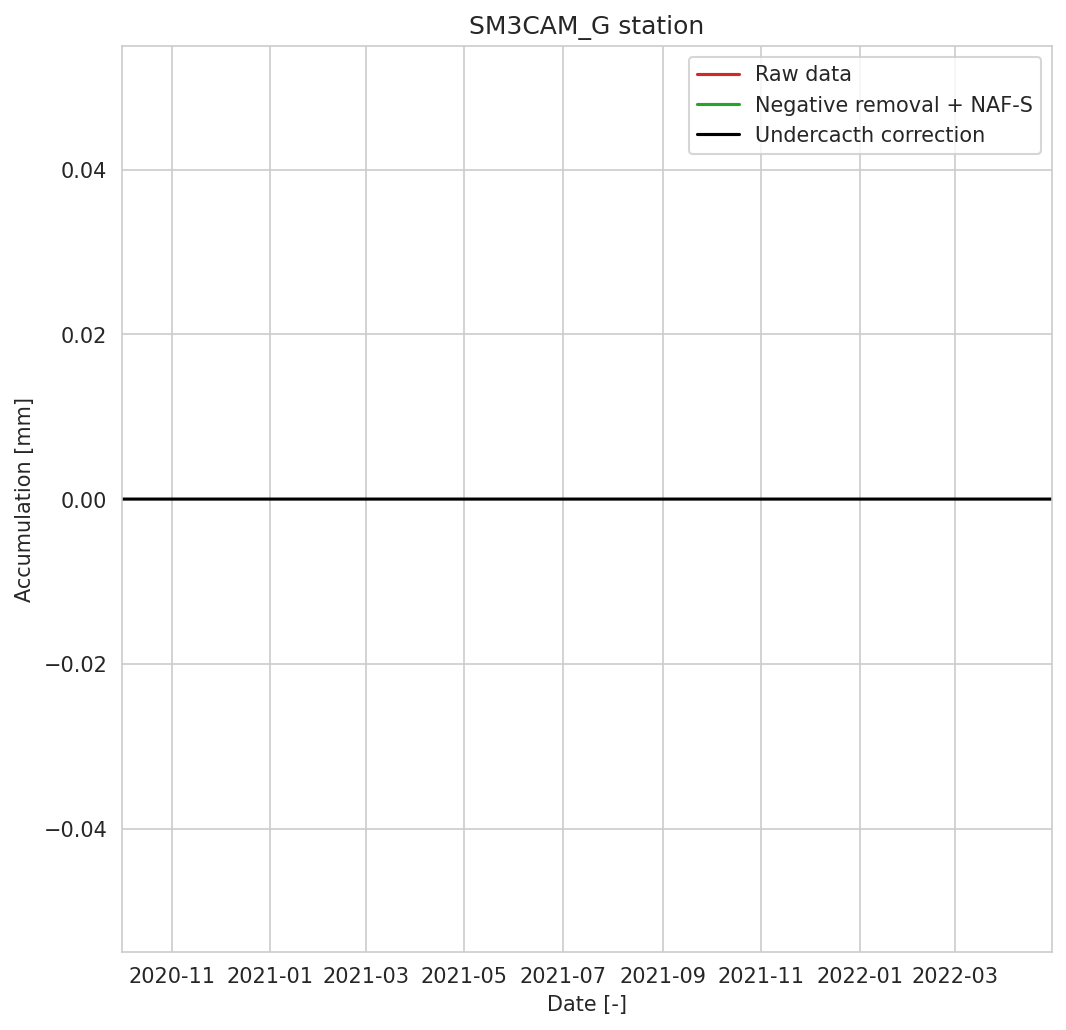

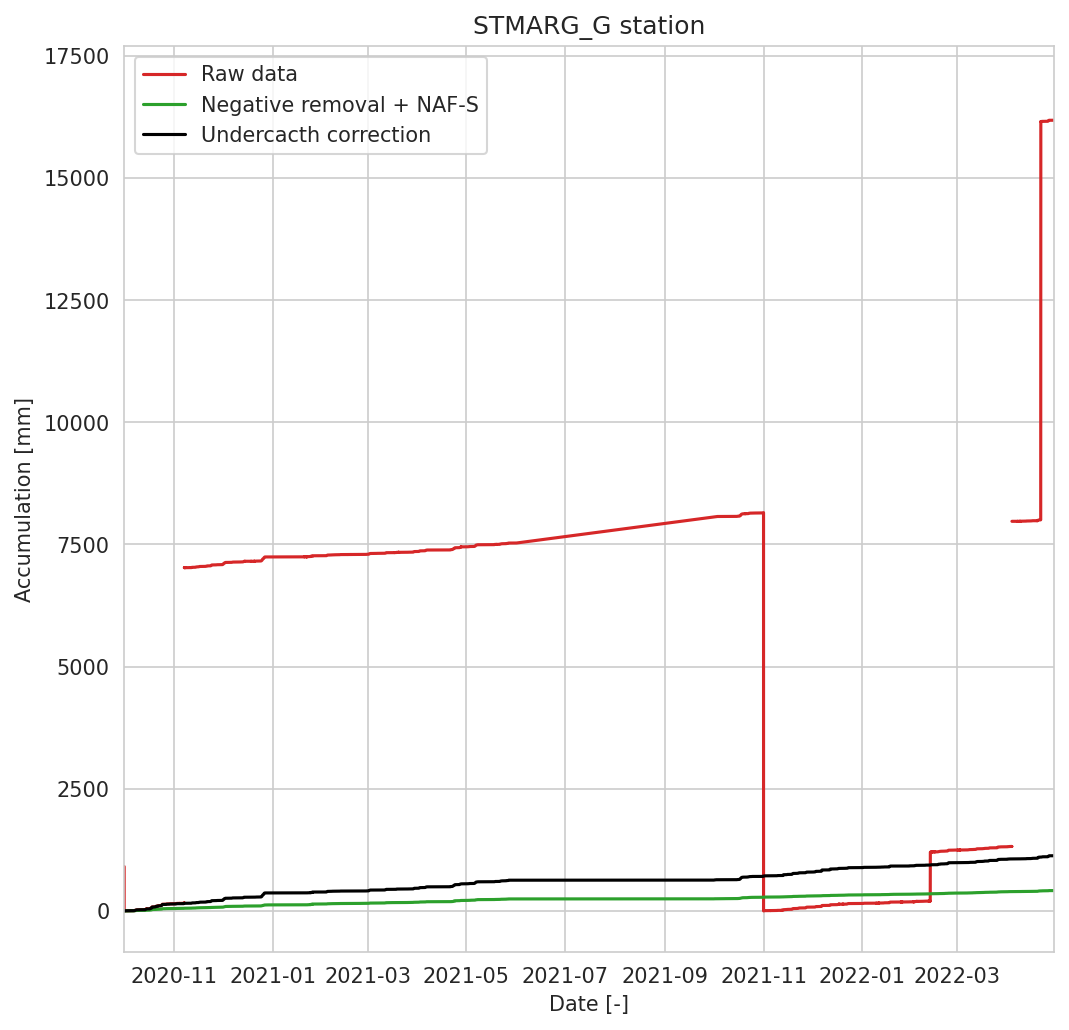

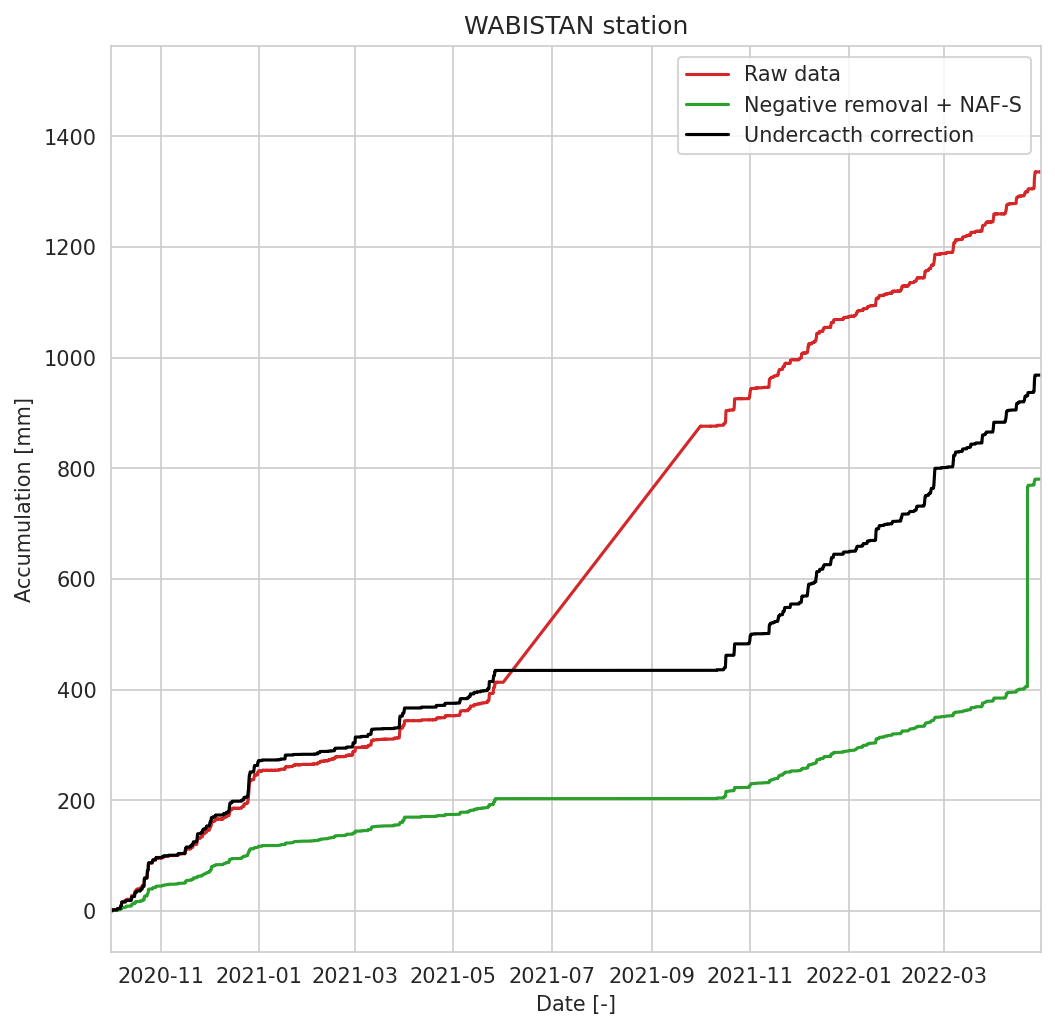

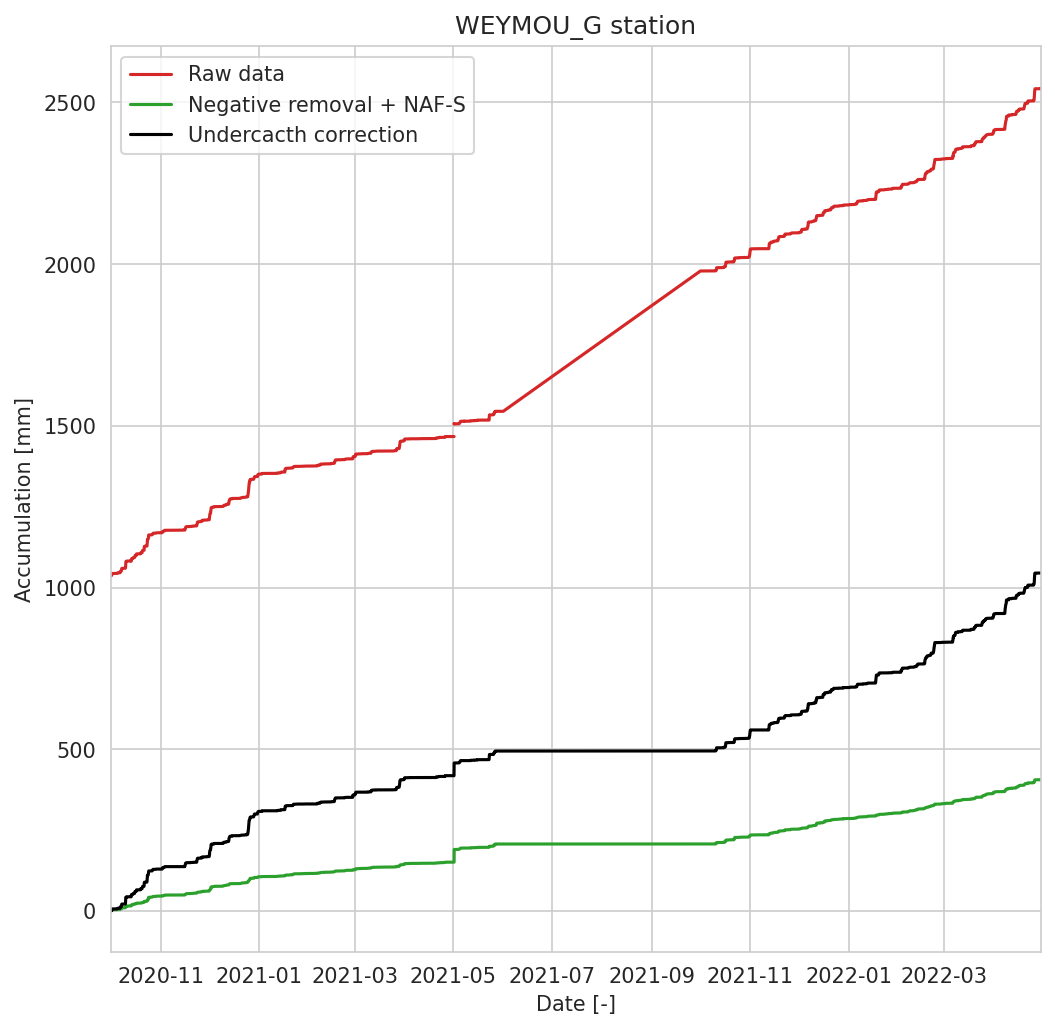

In [5]:
for stat,subdf_1 in df_acc_1.groupby('filename'):

    subdf_2 = df_acc_2.loc[df_acc_2['filename'] == stat]

    subdf_2 = subdf_2.loc['2020-10':'2022-07']
    fig = plt.figure(facecolor='white', figsize=(8, 8), dpi=150)
    spec = fig.add_gridspec(ncols=1, nrows=1)

    # PR
    ax0 = fig.add_subplot(spec[0, 0])

    ax0.plot(subdf_1.index,subdf_1['RAW'],c='tab:red',label='Raw data')
    # ax0.plot(subdf_1.index,np.cumsum(subdf_1['neg'].diff()),c='tab:blue',label='Negative removal + NAF-S')
    naf_data = subdf_1['NAF'].diff()
    naf_data.loc[naf_data<0] = 0
    ax0.plot(subdf_1.index,np.cumsum(naf_data),c='tab:green',label='Negative removal + NAF-S')

    ax0.plot(subdf_2.index,np.cumsum(subdf_2['precip_inst_pluvio']),c='k',label='Undercacth correction')
    ax0.set_title(f'{stat} station')
    ax0.set_xlabel('Date [-]')
    ax0.set_ylabel('Accumulation [mm]')
    ax0.set_xlim([date(2020, 10, 1), date(2022, 4, 30)])
    ax0.legend()
    plt.show()

    format='png'
    fig.savefig(saving_fig_path+f'{stat}.png', dpi=200, format='png' , bbox_inches='tight',) # Most backends support png, pdf,

